In [2]:
##pip install torchvision

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)
print(x.shape)
y = torch.rand([2,5])
print(y)
y.view([1,10])

tensor([10.,  3.])
torch.Size([2])
tensor([[0.8368, 0.1636, 0.9836, 0.9512, 0.2769],
        [0.2990, 0.3073, 0.4349, 0.7291, 0.3126]])


tensor([[0.8368, 0.1636, 0.9836, 0.9512, 0.2769, 0.2990, 0.3073, 0.4349, 0.7291,
         0.3126]])

In [4]:
train = datasets.MNIST("", train = True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download=True, transform = transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle = True)

In [3]:
for data in trainset:
    print(data)
    break
x,y = data[0][0], data[1][0]
print(y)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

torch.Size([1, 28, 28])


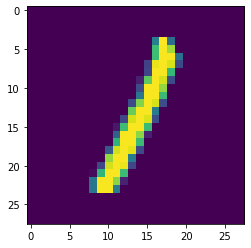

In [4]:
import matplotlib.pyplot as plt
print(data[0][0].shape)
plt.imshow(data[0][0].view(28,28))

In [5]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)]+=1
        total+=1

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
X = torch.rand((28,28))
#view -1 means any batch size
X = X.view(-1, 28*28)
output = net(X)
output

tensor([[-2.2062, -2.4405, -2.1928, -2.2755, -2.2107, -2.4660, -2.3813, -2.2056,
         -2.3340, -2.3607]], grad_fn=<LogSoftmaxBackward>)

In [10]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feasturesets and labels
        X, Y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        #scalar output should use nll_loss, one hot vector uses mse.
        loss = F.nll_loss(output, Y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0217, grad_fn=<NllLossBackward>)
tensor(0.1349, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, Y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == Y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total,3))

Accuracy:  0.975


tensor(8)


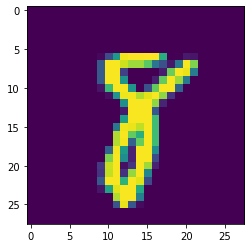

In [16]:
plt.imshow(X[0].view(28,28))
plt.show
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(9)


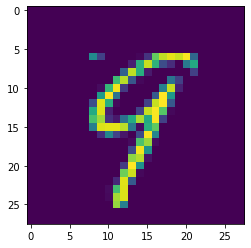

In [17]:
plt.imshow(X[1].view(28,28))
plt.show
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))